In [232]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn.metrics import mean_squared_error

In [233]:
file_path1 = "C:/Users/ferna/Dropbox/UC/Magister/pierre_flutist/recordings/steps/x_test.csv"
file_path2 = "C:/Users/ferna/Dropbox/UC/Magister/pierre_flutist/recordings/steps/z_test.csv"
file_path3 = "C:/Users/ferna/Dropbox/UC/Magister/pierre_flutist/recordings/steps/alpha_test.csv"
file_path4 = "C:/Users/ferna/Dropbox/UC/Magister/pierre_flutist/recordings/steps/flow_test_1.csv"
file_path5 = "C:/Users/ferna/Dropbox/UC/Magister/pierre_flutist/recordings/steps/flow_test_2.csv"

In [234]:
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)
data3 = pd.read_csv(file_path3)
data4 = pd.read_csv(file_path4)
data5 = pd.read_csv(file_path5)

In [235]:
def transform_dataframe(df):
    # Crear un nuevo DataFrame con las columnas "times", "value" y "signal"
    new_df = pd.DataFrame(columns=['times', 'value', 'signal'])
    
    # Crear una lista de DataFrames, uno para cada columna excepto "times"
    dfs = [pd.DataFrame({'times': df['times'], 'value': df[col], 'signal': col}) for col in df.columns.difference(['times'])]
    
    # Concatenar los DataFrames en la lista en uno solo
    new_df = pd.concat(dfs, ignore_index=True)
    
    return new_df

In [236]:
data1['X'] = data1['x'] - 10 
data1['X ref'] = data1['x_ref'] - 10 
data1['error'] = data1['X ref'] - data1['X']
data1['error anterior'] = data1['error'].shift(periods=1)
data1['error anterior'].loc[0] = 0
data1['time anterior'] = data1['times'].shift(periods=1)
data1['time anterior'].loc[0] = -0.037928
data1['error integrado'] = 0.5 * (data1['error'] + data1['error anterior']) * (data1['times']-data1['time anterior'])

data2['Z'] = data2['z'] - 10
data2['Z ref'] = data2['z_ref'] - 10
data2['error'] = data2['Z ref'] - data2['Z']
data2['error anterior'] = data2['error'].shift(periods=1)
data2['error anterior'].loc[0] = 0
data2['error anterior'].loc[0] = 0
data2['time anterior'] = data2['times'].shift(periods=1)
data2['time anterior'].loc[0] = -0.037928
data2['error integrado'] = 0.5 * (data2['error'] + data2['error anterior']) * (data2['times']-data2['time anterior'])

data3['Alpha'] = data3['alpha']
data3['Alpha ref'] = data3['alpha_ref']
data3['error'] = data3['Alpha ref'] - data3['Alpha']
data3['error anterior'] = data3['error'].shift(periods=1)
data3['error anterior'].loc[0] = 0
data3['error anterior'].loc[0] = 0
data3['time anterior'] = data3['times'].shift(periods=1)
data3['time anterior'].loc[0] = -0.037928
data3['error integrado'] = 0.5 * (data3['error'] + data3['error anterior']) * (data3['times']-data3['time anterior'])

data4['Flow'] = data4['mass_flow']
data4['Flow ref'] = data4['flow_ref']
data4['error'] = data4['Flow ref'] - data4['Flow']
data4['error anterior'] = data4['error'].shift(periods=1)
data4['error anterior'].loc[0] = 0
data4['error anterior'].loc[0] = 0
data4['time anterior'] = data4['times'].shift(periods=1)
data4['time anterior'].loc[0] = -0.037928
data4['error integrado'] = 0.5 * (data4['error'] + data4['error anterior']) * (data4['times']-data4['time anterior'])

data5['Flow'] = data5['mass_flow']
data5['Flow ref'] = data5['flow_ref']
data5['error'] = data5['Flow ref'] - data5['Flow']
data5['error anterior'] = data5['error'].shift(periods=1)
data5['error anterior'].loc[0] = 0
data5['error anterior'].loc[0] = 0
data5['time anterior'] = data5['times'].shift(periods=1)
data5['time anterior'].loc[0] = -0.037928
data5['error integrado'] = 0.5 * (data5['error'] + data5['error anterior']) * (data5['times']-data5['time anterior'])


In [251]:
data1['times']

0         0.000000
1         0.037928
2         0.066404
3         0.099075
4         0.127859
           ...    
3561    100.931783
3562    100.962801
3563    100.978504
3564    101.010707
3565    101.041064
Name: times, Length: 3566, dtype: float64

In [267]:
sum(data1['times'])

180358.32196068764

In [238]:
new_data1 = transform_dataframe(data1)
new_data2 = transform_dataframe(data2)
new_data3 = transform_dataframe(data3)
new_data4 = transform_dataframe(data4)
new_data5 = transform_dataframe(data5)

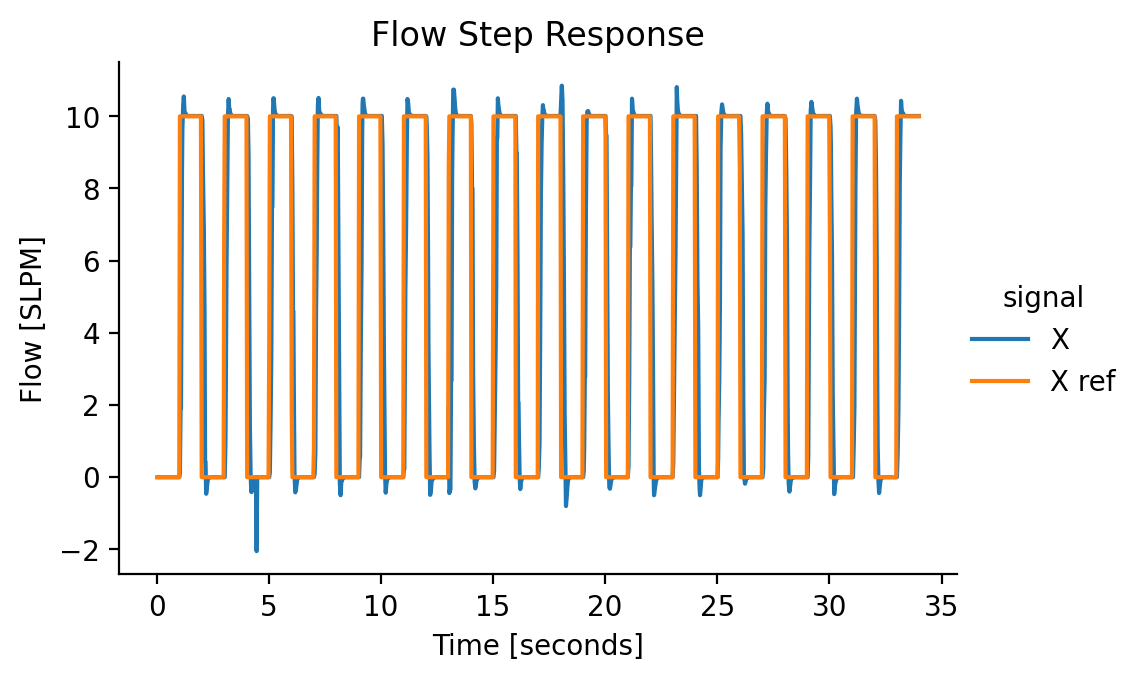

In [308]:
new_data1['Time'] = new_data1['times'] - 0 # Correr el eje del tiempo 13 unidades a la derecha

a4_dims = (2, 5)
p = sns.relplot(data=new_data1.loc[((new_data1['signal'] == 'X') | (new_data1['signal'] == 'X ref')) & (new_data1['times'] < 34) & (new_data1['times'] > 0)], kind="line", x='Time', y='value', hue='signal')
p.fig.set_dpi(200)
p.fig.set_figheight(3)
#sns.move_legend(p, "center right", bbox_to_anchor=(0.8, 0.3), frameon=True)

#plt.axhline(y = 10*1.02, color = 'r', linestyle = '-')

plt.title('Flow Step Response')
plt.xlabel('Time [seconds]')
plt.ylabel('Flow [SLPM]')
#plt.savefig('flow_step_response.png', dpi=300, bbox_inches='tight')
plt.show()

In [240]:
pd.set_option('mode.chained_assignment', None)

In [333]:
rise_time_list = []
overshoot_list = []
settling_time_list = []
ringing_period_list = []
ringing_amplitude_list = []
number_ringing_cycles_list = []
itae_list = []
rmse_list = []

for i in range(0, 100, 2):
    df = data5.loc[(data5['times'] > i+1) & (data5['times'] < i+2)].reset_index()
    df['time'] = df['times']-(i+1)
    cv = 'Flow'

    # assuming your dataframe is called `df` and the response column is 'response'
    steady_state = df[cv].iloc[-10:].mean()

    # calculate rise time
    if len(df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time']) == 0:
        rise_time = 0
    else:
        rise_time = df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[-1] - df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[0]

    # calculate overshoot
    peak = df[cv].max()
    overshoot = (peak - steady_state)/steady_state * 100

    # # calculate settling time
    settling_percentage = 0.02
    settling_criteria_up = steady_state * (1 + settling_percentage)
    if len(df.loc[df[cv] > settling_criteria_up, 'time']):
        settling_time_up = df.loc[df[cv] > settling_criteria_up, 'time'].iloc[-1]
        settling_criteria_down = steady_state * (1 - settling_percentage)
        settling_time_down = df.loc[df[cv] < settling_criteria_down, 'time'].iloc[-1]
        settling_time = max(settling_time_up, settling_time_down)
    else:
        settling_criteria = steady_state * (1 - settling_percentage)
        settling_time = df.loc[df[cv] < settling_criteria, 'time'].iloc[-1]

    # # calculate ringing
    t = df['time'].to_numpy()
    y = df[cv].to_numpy()
    f = np.fft.fft(y)
    N = len(f)
    dt = t[1]-t[0]
    freq = np.fft.fftfreq(N, dt)
    max_index = np.argmax(np.abs(f[1:N//2]))+1
    ringing_period = 1/freq[max_index]
    ringing_amplitude = np.abs(f[max_index])/N*2
    num_ringing_cycles = np.sum(np.abs(np.cos(2*np.pi*freq[max_index]*t) - np.cos(2*np.pi*freq[max_index]*t-dt)) > 1e-2)
    if num_ringing_cycles == 0:
        ringing_amplitude = 0.0

    # e rms
    rmse = np.sqrt(sum(df['error']**2) / len(df['error']))
    rmse_list.append(rmse)

    # itae
    t_set_index = len(df['time'].loc[(df['time'] <= settling_time)])
    itae = 0
    for j in range(t_set_index):
        itae += abs(df['error integrado'].loc[j]) * j
    itae_list.append(itae)

    # # print results
    rise_time_list.append(rise_time)
    overshoot_list.append(overshoot)
    settling_time_list.append(settling_time)
    ringing_period_list.append(ringing_period)
    ringing_amplitude_list.append(ringing_amplitude)
    number_ringing_cycles_list.append(num_ringing_cycles)

    df = data5.loc[(data5['times'] > i+2) & (data5['times'] < i+3)].reset_index()
    df['time'] = df['times']-(i+2)

    cv = 'Flow'
    df[cv] = abs(df[cv]-30)
    #print(i+2, df[cv].iloc[-10:])
    # assuming your dataframe is called `df` and the response column is 'response'
    steady_state = df[cv].iloc[-10:].mean()

    # calculate rise time
    if len(df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time']) == 0:
        rise_time = 0
    else:
        rise_time = df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[-1] - df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[0]
    # rise_time = df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[-1] - df.loc[(df[cv] >= 0.1*steady_state) & (df[cv] <= 0.9*steady_state), 'time'].iloc[0]

    # calculate overshoot
    peak = df[cv].max()
    overshoot = (peak - steady_state)/steady_state * 100

    # # calculate settling time
    settling_percentage = 0.02
    settling_criteria_up = steady_state * (1 + settling_percentage)
    if len(df.loc[df[cv] > settling_criteria_up, 'time']):
        settling_time_up = df.loc[df[cv] > settling_criteria_up, 'time'].iloc[-1]
        settling_criteria_down = steady_state * (1 - settling_percentage)
        #print(steady_state, settling_criteria_down)
        settling_time_down = df.loc[df[cv] < settling_criteria_down, 'time'].iloc[-1]
        settling_time = max(settling_time_up, settling_time_down)
    else:
        settling_criteria = steady_state * (1 - settling_percentage)
        settling_time = df.loc[df[cv] < settling_criteria, 'time'].iloc[-1]

    # # calculate ringing
    t = df['time'].to_numpy()
    y = df[cv].to_numpy()
    f = np.fft.fft(y)
    N = len(f)
    dt = t[1]-t[0]
    freq = np.fft.fftfreq(N, dt)
    max_index = np.argmax(np.abs(f[1:N//2]))+1
    ringing_period = 1/freq[max_index]
    ringing_amplitude = np.abs(f[max_index])/N*2
    num_ringing_cycles = np.sum(np.abs(np.cos(2*np.pi*freq[max_index]*t) - np.cos(2*np.pi*freq[max_index]*t-dt)) > 1e-2)
    if num_ringing_cycles == 0:
        ringing_amplitude = 0.0
    
    # e rms
    rmse = np.sqrt(sum(df['error']**2) / len(df['error']))
    rmse_list.append(rmse)

    # itae
    t_set_index = len(df['time'].loc[(df['time'] <= settling_time)])
    itae = 0
    for j in range(t_set_index):
        itae += abs(df['error integrado'].loc[j]) * j
    itae_list.append(itae)

    # # print results
    rise_time_list.append(rise_time)
    overshoot_list.append(overshoot)
    settling_time_list.append(settling_time)
    ringing_period_list.append(ringing_period)
    ringing_amplitude_list.append(ringing_amplitude)
    number_ringing_cycles_list.append(num_ringing_cycles)

In [334]:
rise_time = np.array(rise_time_list)
print(rise_time.mean(), rise_time.std())

0.13064404010772734 0.050417936432333416


In [335]:
overshoot = np.array(overshoot_list)
print(overshoot.mean(), overshoot.std())

0.030462745591064707 0.12339015139521357


In [336]:
settling_time = np.array(settling_time_list)
print(settling_time.mean(), settling_time.std())

0.31920695781707825 0.055419578977050105


In [337]:
itae = np.array(itae_list)
print(itae.mean(), itae.std())

3.961823414721494 0.94021652746934


In [338]:
rmse = np.array(rmse_list)
print(rmse.mean(), rmse.std())

2.039492304076604 0.48191563452890157


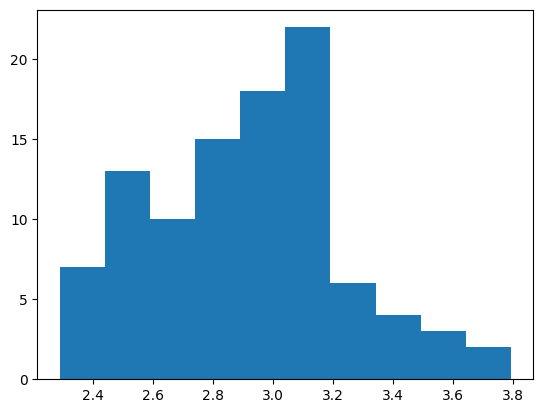

In [320]:
plt.hist(rmse)
plt.show()